In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def _plt(img, cmap,title, fsize,p):
    if p == 0:
        plt.title(title, fontsize=fsize)
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(img, cmap=cmap)


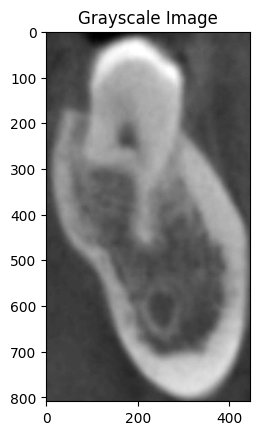

In [3]:
# Read the image in grayscale
image = cv2.imread('M3_Dataset/m3_1_1.jpg', cv2.IMREAD_GRAYSCALE)
_plt(image, 'gray', 'Grayscale Image', 12, 0)

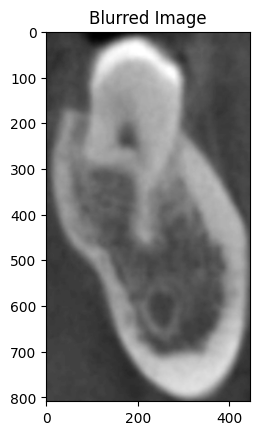

In [4]:
# Noise Removal (Gaussian Blur)
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
_plt(blurred_image, 'gray', 'Blurred Image', 12, 0)


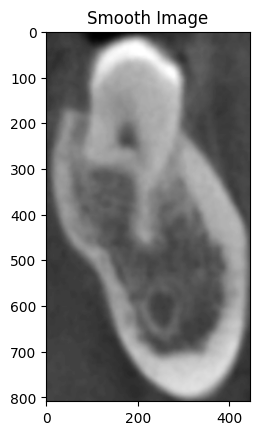

In [5]:
# Smoothen Image (Median Blur)
smooth_image = cv2.medianBlur(blurred_image, 5)
_plt(smooth_image, 'gray', 'Smooth Image', 12, 0)


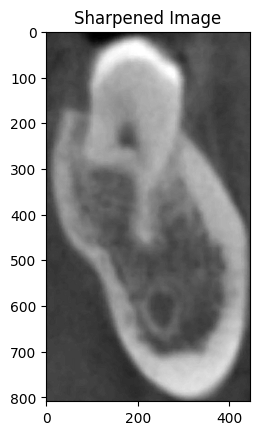

In [6]:
# Sharpen Image
kernel = np.array([[-1, -1, -1],
                  [-1, 9, -1],
                  [-1, -1, -1]])
sharpened_image = cv2.filter2D(smooth_image, -1, kernel)
_plt(sharpened_image, 'gray', 'Sharpened Image', 12, 0)


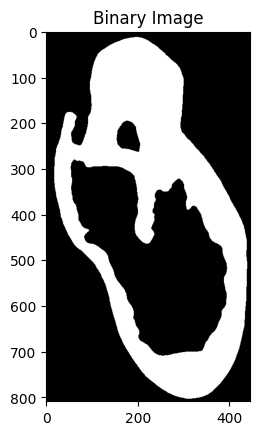

In [7]:
# Binarization (Simple Thresholding)
_, binary_image = cv2.threshold(smooth_image, 127, 255, cv2.THRESH_BINARY)
_plt(binary_image, 'gray', 'Binary Image', 12, 0)

Region of Interest

Use ms paint on the image you will use, then you manually mark the ROI. 
Then use python code to input the ROI

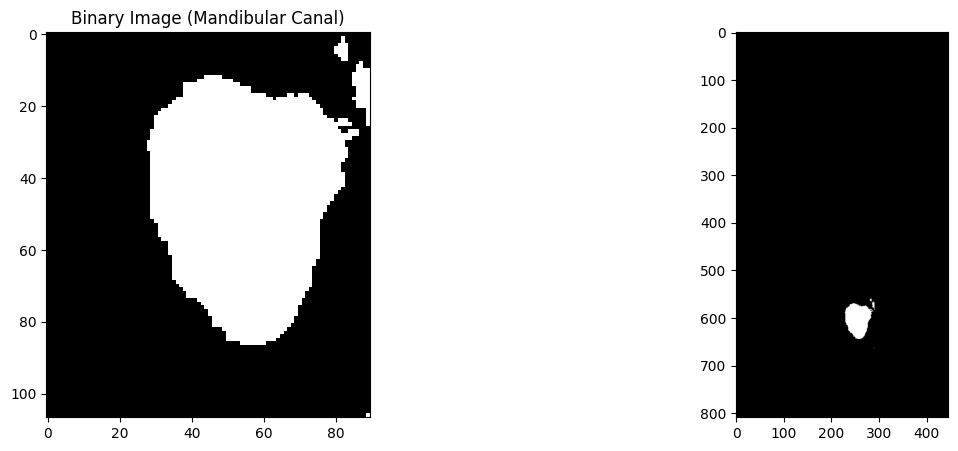

In [8]:
# Define the region of interest (ROI) on the grayscale image
x1, y1, x2, y2 = 200, 558, 290, 665  # Specify the region coordinates

# Create a copy of the grayscale image
roi_image = image.copy()

# Apply a threshold value of 80 within the ROI using binary inverse
threshold_roi = 80  # Set the threshold value to 80 for the ROI
roi = roi_image[y1:y2, x1:x2]
_, binary_inverse_roi = cv2.threshold(roi, threshold_roi, 255, cv2.THRESH_BINARY_INV)
roi_image[y1:y2, x1:x2] = binary_inverse_roi

# Set the rest of the image (outside the ROI) to be completely black
roi_image[:y1, :] = 0
roi_image[y2:, :] = 0
roi_image[:, :x1] = 0
roi_image[:, x2:] = 0

# Display the result
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121)
_plt(binary_inverse_roi, 'gray', 'Binary Image (Mandibular Canal)', 12, 0)

ax = fig.add_subplot(122)
_plt(roi_image, 'gray', 'Mandibular Canal Detected (Binary Inverse Threshold)', 12, 1)


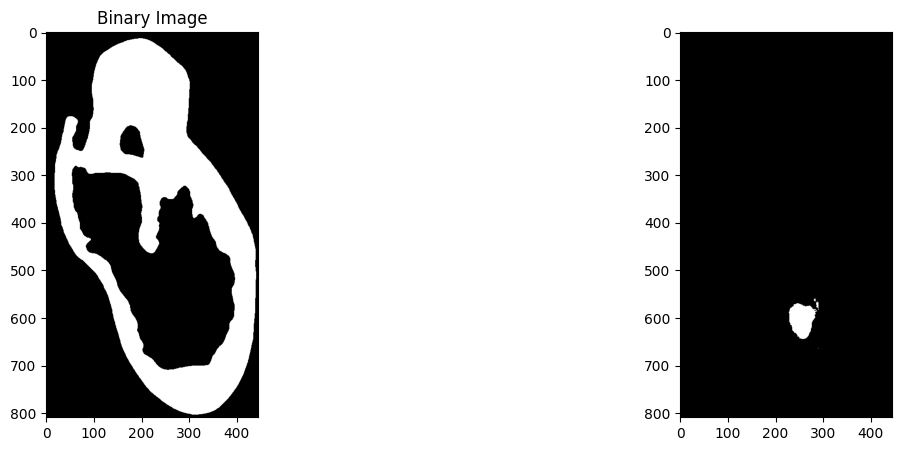

In [9]:
# Display the result
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121)
_plt(binary_image, 'gray', 'Binary Image', 12, 0)


ax = fig.add_subplot(122)
_plt(roi_image, 'gray', 'Mandibular Canal Detected (Binary Inverse Threshold)', 12, 1)

****

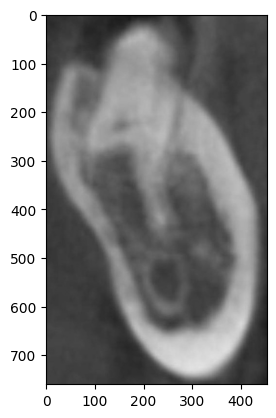

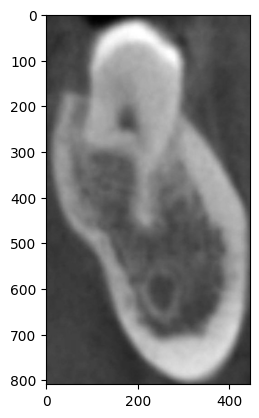

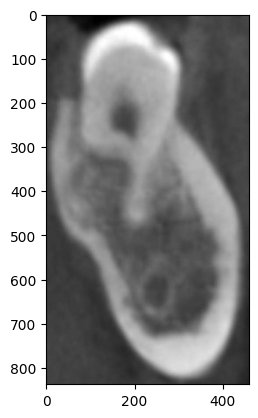

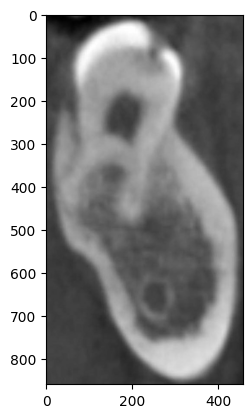

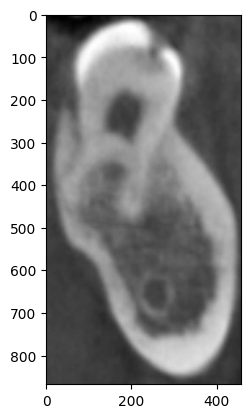

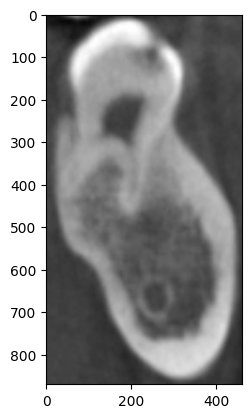

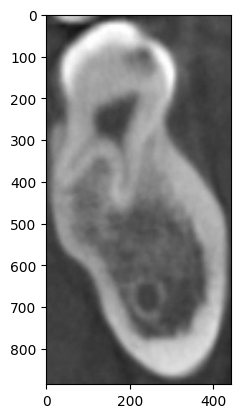

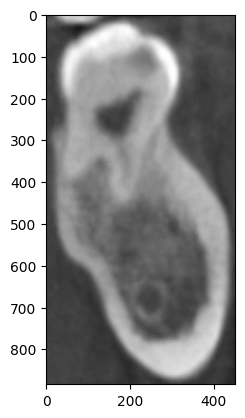

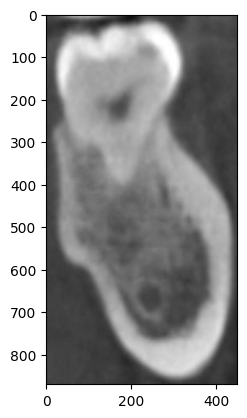

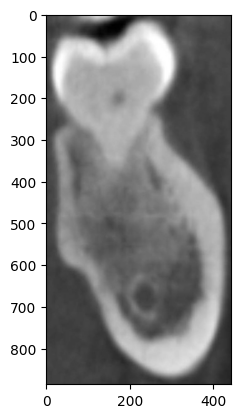

In [10]:
# import the modules
import os
from os import listdir
 
# get the path/directory
folder_dir = "M3_Dataset"
for images in os.listdir(folder_dir):
 
    # check if the image ends with png
    if (images.endswith(".jpg")):
        # read the image
        image = plt.imread(os.path.join(folder_dir, images))

        # display the image
        plt.imshow(image)
        plt.show()

In [11]:
def binarize_with_threshold(image, threshold_value):
    # Binarization (Simple Thresholding)
    _, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    return binary_image


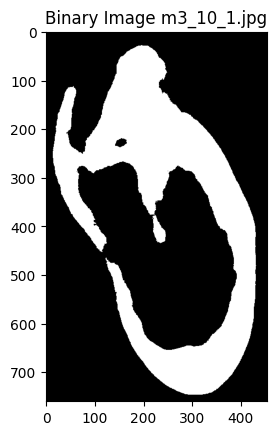

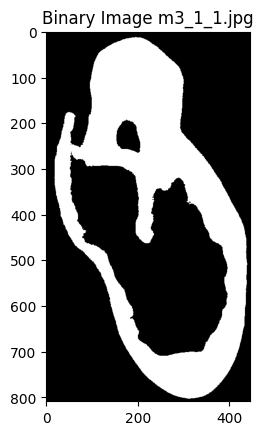

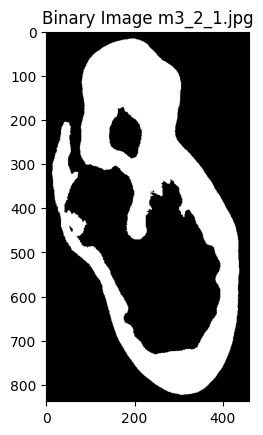

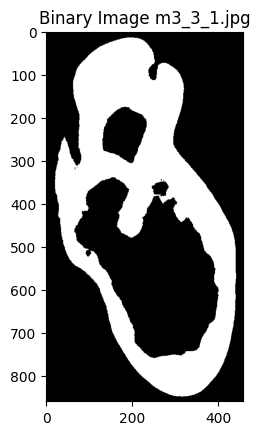

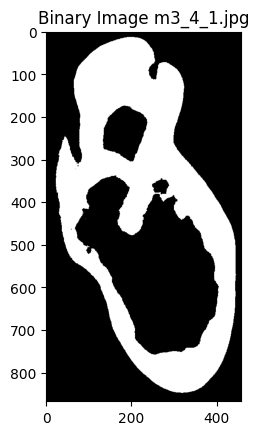

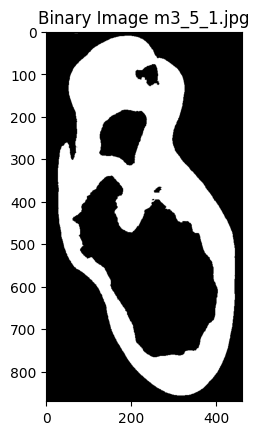

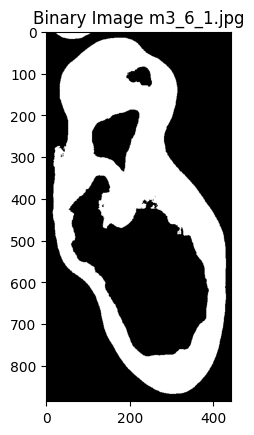

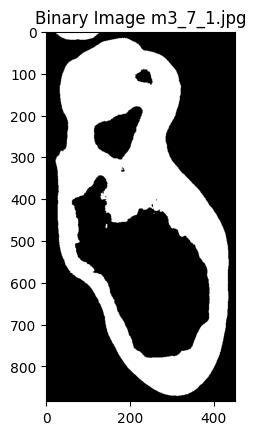

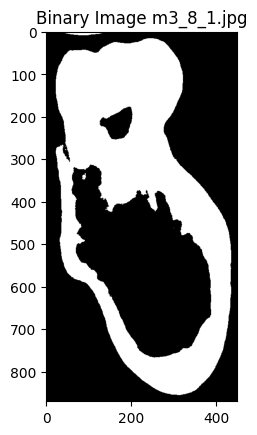

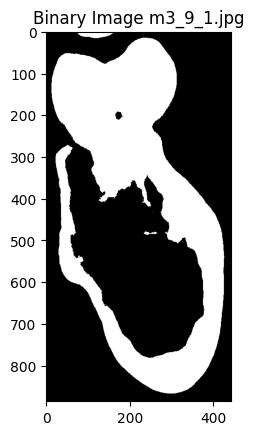

In [12]:
folder_dir = "M3_Dataset"
image_files = [f for f in os.listdir(folder_dir) if f.endswith(".jpg")]

for image_file in image_files:
    image_path = os.path.join(folder_dir, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    binary_image = binarize_with_threshold(image, 130)  # Adjust the threshold value as needed

   
    ax = fig.add_subplot(121)
    _plt(binary_image, 'gray', f'Binary Image {image_file}', 12, 0)

    # Show the plot with the image name
    plt.show()

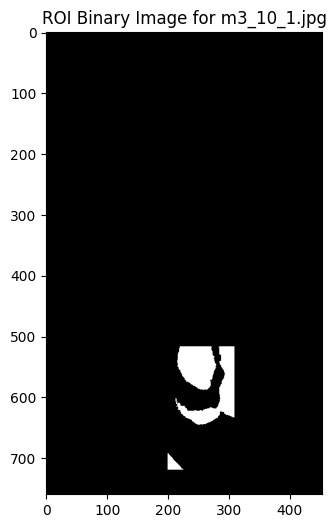

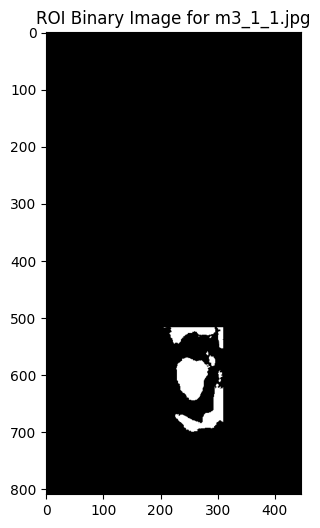

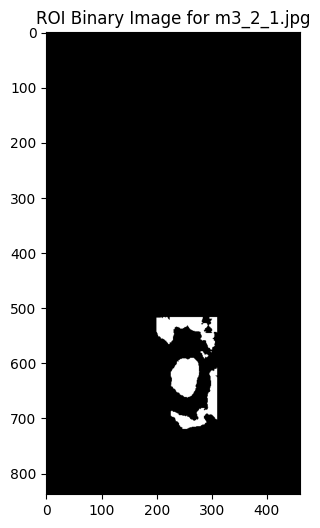

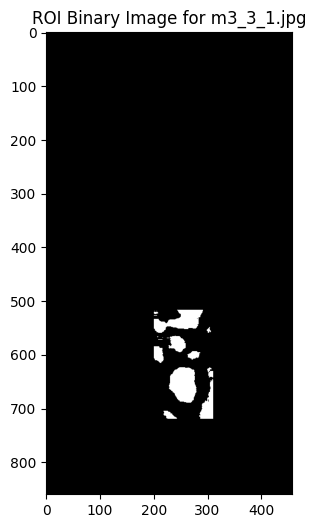

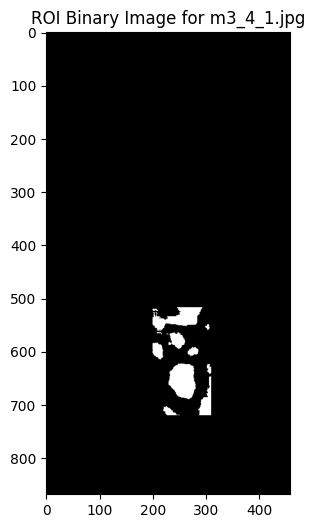

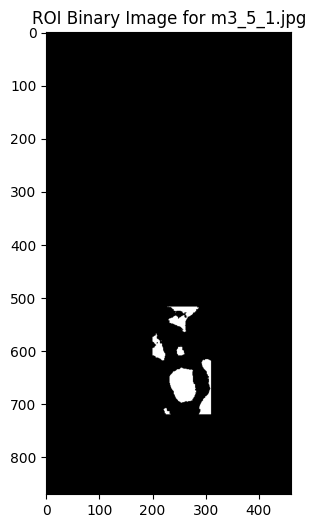

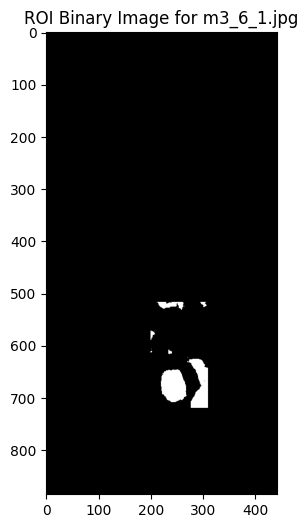

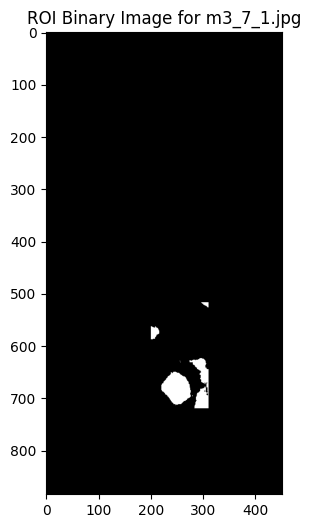

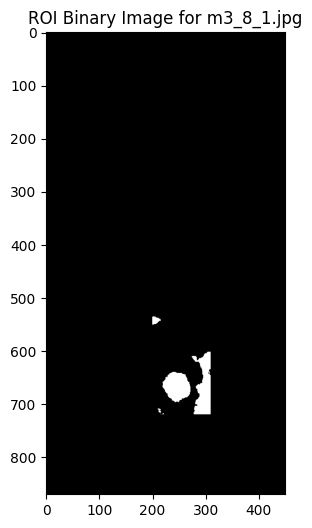

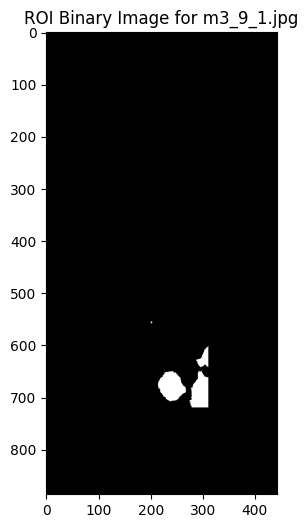

In [13]:
import cv2
import os
from matplotlib import pyplot as plt

# Path to the image directory
folder_dir = "M3_Dataset"
image_files = [f for f in os.listdir(folder_dir) if f.endswith(".jpg")]

for image_file in image_files:
    image_path = os.path.join(folder_dir, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Define the region of interest (ROI) coordinates
    #x1, y1, x2, y2 = 200, 558, 290, 665
    x1, y1, x2, y2 = 200,  517, 310, 720 #Adjust ROI using ms Paint

    # Create a copy of the grayscale image
    roi_image = image.copy()

    # Apply a threshold value of 80 within the ROI using binary inverse
    threshold_roi = 80
    roi = roi_image[y1:y2, x1:x2]
    _, binary_inverse_roi = cv2.threshold(roi, threshold_roi, 255, cv2.THRESH_BINARY_INV)
    roi_image[y1:y2, x1:x2] = binary_inverse_roi

    # Set the rest of the image (outside the ROI) to be completely black
    roi_image[:y1, :] = 0
    roi_image[y2:, :] = 0
    roi_image[:, :x1] = 0
    roi_image[:, x2:] = 0

    # Show the ROI binary image for the current image
    plt.figure(figsize=(8, 6))
    plt.title(f'ROI Binary Image for {image_file}', fontsize=12)
    plt.imshow(roi_image, cmap='gray')
    plt.show()


****

In [14]:
import cv2
import os
from PIL import Image

3rd Molar

In [15]:
# Path to the image directory
folder_dir = "M3_Dataset"

# Get the list of image files in the directory
image_files = [f for f in os.listdir(folder_dir) if f.endswith(".jpg")]

# Create a directory for the output images if it does not exist
output_dir = os.path.join("output", "3rdMolar")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Iterate through the image files and save each image to the output directory
for image_file in image_files:

    # Load the image
    image = cv2.imread(os.path.join(folder_dir, image_file))

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply the threshold
    binary_image = binarize_with_threshold(image, 130)  # Adjust the threshold value as needed

    # Save the threshold image
    cv2.imwrite(os.path.join(output_dir, "threshold_" + image_file),  binary_image)


M Canal

In [16]:
def detect_mandibular_canal(image_path, x1, y1, x2, y2, threshold_roi=80, output_dir="output/MCanal"):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the loaded image is not empty
    if image is not None and image.size != 0:
        # Create a copy of the grayscale image
        roi_image = image.copy()

        # Apply a threshold value within the ROI using binary inverse
        roi = roi_image[y1:y2, x1:x2]
        _, binary_inverse_roi = cv2.threshold(roi, threshold_roi, 255, cv2.THRESH_BINARY_INV)
        roi_image[y1:y2, x1:x2] = binary_inverse_roi

        # Set the rest of the image (outside the ROI) to be completely black
        roi_image[:y1, :] = 0
        roi_image[y2:, :] = 0
        roi_image[:, :x1] = 0
        roi_image[:, x2:] = 0

        # Save the ROI image
        output_file = os.path.join(output_dir, f"ROI_{os.path.basename(image_path)}")
        cv2.imwrite(output_file, roi_image)
    else:
        print(f"Loaded image is empty: {image_path}")

In [17]:
# Path to the image directory
folder_dir = "M3_Dataset"
output_dir = "output/MCanal"  # Output directory for the ROI images

# Create the output directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Get the list of image files in the directory
image_files = [f for f in os.listdir(folder_dir) if f.endswith(".jpg")]

for image_file in image_files:
    image_path = os.path.join(folder_dir, image_file)
    detect_mandibular_canal(image_path, 200, 558, 315, 700, threshold_roi=80, output_dir=output_dir)